In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/Colab/SeoulBigData/XGBoost_Logistic_regression/'
_population = 'population.csv'
_s_dot = 's_dot2.csv'
_weather_per_min = 'weather_per_min.csv'
_weather_real_time = 'weather_real_time.csv'
_weatherID = 'META_관측지점정보_20211004124530.csv'

population = pd.read_csv(path + _population)
s_dot = pd.read_csv(path + _s_dot, encoding='euc-kr')
weather_per_min = pd.read_csv(path + _weather_per_min)
weather_real_time = pd.read_csv(path + _weather_real_time)
weatherID = pd.read_csv(path + _weatherID, encoding='euc-kr')

FileNotFoundError: ignored

In [ ]:
weather_per_min.drop(['SECTIME(년월일시분)','S00A(풍향)','S00A_S(풍향)','S01A(풍속)','S02A(기온)','S03M(강수)','S04A(강수유무)','S05A(습도)','S07M(일조)'], axis='columns', inplace=True)

In [ ]:
weatherID.drop(['지점'], axis='columns', inplace=True)
weatherID.head()

,시작일,종료일,지점명,지점주소,관리관서,위도,경도,노장해발고도(m),기압계(관측장비지상높이(m)),기온계(관측장비지상높이(m)),풍속계(관측장비지상높이(m)),강우계(관측장비지상높이(m))
0,1900-01-01,NaN,선봉,NaN,NaN,42.3167,130.4000,3.0,NaN,NaN,NaN,NaN
1,1900-01-01,NaN,삼지연,NaN,NaN,41.8167,128.3167,1386.0,NaN,NaN,NaN,NaN
2,1900-01-01,NaN,청진,NaN,NaN,41.7833,129.8167,43.0,NaN,NaN,NaN,NaN
3,2007-11-30,NaN,안면도(감),NaN,NaN,36.5333,126.3167,60.0,NaN,NaN,NaN,NaN
4,1900-01-01,NaN,중강,NaN,NaN,41.7833,126.8833,332.0,NaN,NaN,NaN,NaN


In [ ]:
weather_per_min.head()

,SCAPTION(지점명),S06M(일사)
0,[서] 도봉,0
1,[서] 도봉,0
2,[서] 도봉,0
3,[서] 도봉,0
4,[서] 도봉,0


In [ ]:
weather_per_mins = weather_per_min.sort_values(by = "S06M(일사)",ascending = False)
weather_per_mins

,SCAPTION(지점명),S06M(일사)
0,[서] 도봉,0
1516,[서] 도봉,0
1510,[서] 도봉,0
1511,[서] 도봉,0
1512,[서] 도봉,0
...,...,...
750,[서] 도봉,0
749,[서] 도봉,0
748,[서] 도봉,0
747,[서] 도봉,0


In [ ]:
# s_dot.drop(['기관 명', '송신 서버 번호', '데이터 번호', '모델명', '구분', '초미세먼지(㎍/㎥)',
#        '미세먼지(㎍/㎥)', '기온(℃)', '상대습도( %)', '풍향(°)', '풍속(m/s)', '돌풍 풍향(°)',
#        '돌풍 풍속(m/s)', '조도(lux)'], axis='columns', inplace=True)
# s_dot.drop(['소음(dB)', '진동_x(g)', '진동_y(g)',
#        '진동_z(g)', '진동_x 최대(g)', '진동_y 최대(g)', '진동_z 최대(g)', '흑구 운도(℃)',
#        '초미세먼지 보정(㎍/㎥)', '미세먼지 보정(㎍/㎥)', '전송시간', ], axis='columns', inplace=True)

In [ ]:
# 추가적인 칼럼 수정
s_dot.rename(columns = {'시리얼':'시리얼번호'}, inplace = True)
s_dot.head()

,기관 명,송신 서버 번호,데이터 번호,모델명,시리얼번호,구분,초미세먼지(㎍/㎥),미세먼지(㎍/㎥),기온(℃),상대습도( %),풍향(°),풍속(m/s),돌풍 풍향(°),돌풍 풍속(m/s),조도(lux),자외선(UVI),소음(dB),진동_x(g),진동_y(g),진동_z(g),진동_x 최대(g),진동_y 최대(g),진동_z 최대(g),흑구 운도(℃),초미세먼지 보정(㎍/㎥),미세먼지 보정(㎍/㎥),전송시간,등록일자
0,서울시,48,1,SDOT001,V02Q1940947,1,9,9,20.9,88,NaN,NaN,NaN,NaN,17.0,0.0,52.0,0.01,0.06,1.02,0.06,0.12,1.09,NaN,8,10,2.020000e+11,07:57.0
1,서울시,48,1,SDOT001,V02Q1940946,1,6,6,20.7,89,NaN,NaN,NaN,NaN,6.0,0.0,44.0,0.09,0.12,0.98,0.13,0.17,1.09,NaN,10,10,2.020000e+11,07:57.0
2,서울시,48,1,SDOT001,V02Q1940948,1,5,5,21.7,88,NaN,NaN,NaN,NaN,0.0,0.0,43.0,0.02,0.08,1.03,0.06,0.14,1.10,NaN,7,9,2.020000e+11,07:57.0
3,서울시,48,1,SDOT001,V02Q1940949,1,5,5,20.7,88,NaN,NaN,NaN,NaN,125.0,0.0,47.0,0.01,0.02,1.05,0.05,0.13,1.14,NaN,8,9,2.020000e+11,07:57.0
4,서울시,48,1,SDOT001,V02Q1940950,1,6,6,21.2,86,NaN,NaN,NaN,NaN,9.0,0.0,38.0,0.01,0.11,0.96,0.06,0.17,1.04,NaN,7,9,2.020000e+11,07:57.0


In [ ]:
# 같은것 모음
s_dotgroup = s_dot.groupby('시리얼번호').sum()
s_dotgroup

,송신 서버 번호,데이터 번호,구분,초미세먼지(㎍/㎥),미세먼지(㎍/㎥),기온(℃),상대습도( %),풍향(°),풍속(m/s),돌풍 풍향(°),돌풍 풍속(m/s),조도(lux),자외선(UVI),소음(dB),진동_x(g),진동_y(g),진동_z(g),진동_x 최대(g),진동_y 최대(g),진동_z 최대(g),흑구 운도(℃),초미세먼지 보정(㎍/㎥),미세먼지 보정(㎍/㎥),전송시간
시리얼번호,,,,,,,,,,,,,,,,,,,,,,,,
OC3CL200011,48,1,1,6,9,21.6,88,0.0,0.0,0.0,0.0,0.0,1.3,45.0,0.00,0.00,0.00,0.0,0.00,0.00,19.7,8,13,2.020000e+11
OC3CL200012,48,1,1,8,12,20.7,100,0.0,0.0,0.0,0.0,0.0,0.0,61.0,0.00,0.00,0.00,0.0,0.00,0.00,20.1,8,16,2.020000e+11
OC3CL200013,48,1,1,7,11,20.4,100,0.0,0.0,0.0,0.0,0.0,0.0,48.0,0.00,0.00,0.00,0.0,0.00,0.00,19.8,10,18,2.020000e+11
OC3CL200014,48,1,1,9,13,20.8,100,0.0,0.0,0.0,0.0,0.0,1.3,52.0,0.00,0.00,0.00,0.0,0.00,0.00,20.1,11,16,2.020000e+11
OC3CL200016,48,1,1,5,8,20.6,100,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.00,0.00,0.00,0.0,0.00,0.00,19.9,8,14,2.020000e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V02Q1940955,96,2,2,9,9,42.3,173,0.0,0.0,0.0,0.0,0.0,0.0,92.0,0.02,0.14,2.06,0.1,0.26,2.21,0.0,11,15,4.040000e+11
V02Q1941000,96,2,2,9,15,41.7,179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,15,25,4.040000e+11
V02Q1941006,96,2,2,2,2,41.6,179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,3,2,4.040000e+11


In [ ]:
# xgb와 logistic을 위해서는 위치정보는 필요 없음 
s_dotgroup_big = s_dotgroup.sort_values(by = "자외선(UVI)",ascending = False)
s_dotgroup_big


,송신 서버 번호,데이터 번호,구분,초미세먼지(㎍/㎥),미세먼지(㎍/㎥),기온(℃),상대습도( %),풍향(°),풍속(m/s),돌풍 풍향(°),돌풍 풍속(m/s),조도(lux),자외선(UVI),소음(dB),진동_x(g),진동_y(g),진동_z(g),진동_x 최대(g),진동_y 최대(g),진동_z 최대(g),흑구 운도(℃),초미세먼지 보정(㎍/㎥),미세먼지 보정(㎍/㎥),전송시간
시리얼번호,,,,,,,,,,,,,,,,,,,,,,,,
V02Q1940804,96,2,2,7,7,39.9,187,0.0,0.0,0.0,0.0,0.0,32.0,96.0,0.06,0.12,2.16,0.18,0.25,2.29,38.3,12,14,4.040000e+11
V02Q1940788,96,2,2,11,11,41.6,187,0.0,0.0,0.0,0.0,0.0,32.0,96.0,0.08,0.12,2.08,0.19,0.24,2.24,0.0,15,19,4.040000e+11
V02Q1940297,48,1,1,5,5,20.5,91,0.0,0.0,0.0,0.0,8.0,16.0,41.0,0.02,0.05,1.05,0.07,0.12,1.13,0.0,8,11,2.020000e+11
V02Q1940560,48,1,1,7,7,21.4,85,0.0,0.0,0.0,0.0,0.0,16.0,58.0,0.01,0.11,1.08,0.05,0.16,1.15,0.0,9,11,2.020000e+11
V02Q1940693,48,1,1,6,6,21.2,88,0.0,0.0,0.0,0.0,0.0,16.0,59.0,0.02,0.06,1.02,0.07,0.11,1.09,0.0,8,8,2.020000e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V02Q1940179,48,1,1,5,5,20.8,90,0.0,0.0,0.0,0.0,0.0,0.0,47.0,0.07,0.09,1.05,0.13,0.14,1.13,0.0,7,9,2.020000e+11
V02Q1940180,48,1,1,11,11,20.3,91,0.0,0.0,0.0,0.0,0.0,0.0,63.0,0.03,0.06,1.04,0.08,0.12,1.12,0.0,12,12,2.020000e+11
V02Q1940181,48,1,1,7,7,20.8,90,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.01,0.10,1.02,0.05,0.15,1.09,0.0,8,9,2.020000e+11


In [ ]:
# 300W 모듈 하나 x 일사량 W : 단위 시간당 얼마만큼의 전기를 생산하는지 
# x_train은 일사와 자외선, y_train은 태양광 발전량 

ilsa = weather_per_mins['S06M(일사)'][:1094]
ilsa = ilsa + 0.3
uvi = s_dotgroup['자외선(UVI)']
sun = 300 * ilsa
sun

0       90.0
1516    90.0
1510    90.0
1511    90.0
1512    90.0
        ... 
1851    90.0
1852    90.0
1854    90.0
1861    90.0
1855    90.0
Name: S06M(일사), Length: 1094, dtype: float64

In [ ]:
ilsa = ilsa[:1094]
print(len(ilsa))
print(len(uvi))
df = pd.DataFrame({
    'ilsa': ilsa.values,
    'uvi': uvi.values,
    'sunpower': sun.values
})

1094
1094


In [174]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

X_t = df[['ilsa', 'uvi']]
Y_t = df['sunpower']
print(X_t.head())
print(Y_t.head())
print(type(X_t))
scaler = StandardScaler()
scaler.fit(X_t)
X_scaled = scaler.transform(X_t)
X_scaled = pd.DataFrame(data=X_scaled, index=X_t.index, columns=X_t.columns)
X_scaled.columns

   ilsa  uvi
0   0.3  1.3
1   0.3  0.0
2   0.3  0.0
3   0.3  1.3
4   0.3  0.0
0    90.0
1    90.0
2    90.0
3    90.0
4    90.0
Name: sunpower, dtype: float64
<class 'pandas.core.frame.DataFrame'>


Index(['ilsa', 'uvi'], dtype='object')

In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_t, test_size=0.3, random_state=1)

In [176]:
from xgboost import XGBClassifier

# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [177]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        90.0       1.00      1.00      1.00       329

    accuracy                           1.00       329
   macro avg       1.00      1.00      1.00       329
weighted avg       1.00      1.00      1.00       329



IndexError: ignored

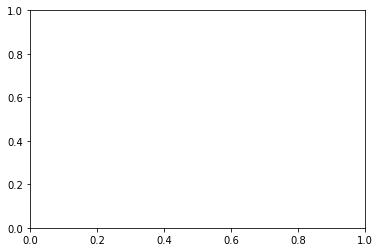

In [182]:
from sklearn.metrics import plot_precision_recall_curve

fig = plt.figure()
ax = fig.gca()
# plot_precision_recall_curve(model_lr, X_test, y_test, ax=ax)
plot_precision_recall_curve(model_xgb, X_test, y_test, ax=ax)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


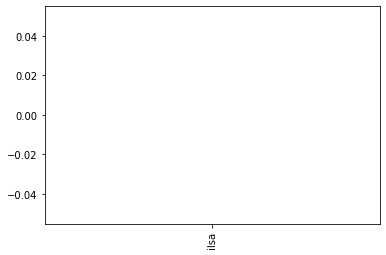

In [179]:
# plt.bar(X_scaled.columns, model_xgb.feature_importances_)
# plt.xticks(rotation=90)
# plt.show()